In [1]:
import glob
#from pyltp import Segmentor #https://pypi.python.org/pypi/pyltp
#import jieba  #https://pypi.org/project/jieba/#description
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score

#stop word
#https://github.com/dongxiexidian/Chinese/blob/master/stopwords.dat
#https://www.kaggle.com/adamschroeder/countvectorizer-tfidfvectorizer-predict-comments  CountVectorizer, TfidfVectorizer, Predict Comments
#https://towardsdatascience.com/machine-learning-nlp-text-classification-using-scikit-learn-python-and-nltk-c52b92a7c73a

In [2]:
#import master file to pickle
df_master_w_class = pd.read_pickle('df_master_w_class.pkl')
#stopwords = pd.read_csv("stop_word_sim_chinese.txt") 
#df_master_w_class['tokenized_text'].apply(seg_sentence)

In [3]:
df_labelled = df_master_w_class[~df_master_w_class['class'].isnull()]
df_predict = df_master_w_class[df_master_w_class['class'].isnull()]
#df_labelled.to_csv('df_train.csv', index = False, encoding = 'utf-8')

In [4]:
df_labelled.head()

,dataset,comments_count,created_at,id,likes_count,retweets_count,text,user_id,class,class_name,tokenized_text
22,df_1_8,0,2016-03-18 17:45:00,DmQ7aCjDD,0,3,:「蘇富比钻石」展售会及「瑰丽珠宝及翡翠首饰」春拍预展将于3月23至24日于#香港蘇富比艺术...,2308351693,7.0,Jewellery,蘇 富比 钻石 展售会 瑰丽 珠宝 翡翠 首饰 春拍 预展 月 mask_num ma...
27,df_1_8,1,2016-03-16 16:34:00,DmwNjrIXz,2,4,:#蘇富比洋酒零售#专家为您挑选多款1000港元以下的一级酒庄和布艮地特级酒酿。300港元以...,2308351693,8.0,Artefact,蘇 富比 洋酒 零售 专家 挑选 多款 mask_num 港元 一级 酒庄 布艮地 特级...
50,df_1_8,2,2017-02-15 17:54:00,EvFscAk97,10,7,":#纽约蘇富比#亚洲艺术周将于3月举槌，呈献7场拍卖及1场展售会，共囊括逾1,200件拍品！...",2308351693,5.0,Chinese PDC,纽约 蘇 富比 亚洲 艺术 周将 月 举槌 呈献 场 拍卖 场展 售会 共 囊括 逾 ma...
59,df_1_8,1,2017-03-11 11:06:00,Ezh2zm0WS,8,2,:#香港蘇富比#将于4月4日举行「人间异珍：奇．趣」拍卖。今天，蘇富比中国艺术品部国际主管及...,2308351693,8.0,Artefact,香港 蘇 富比 月 日 人间 异珍 奇 ． 趣 拍卖 蘇 富比 中国 艺术品 部 国际 主管...
72,df_1_8,2,2016-11-17 17:00:00,EhYDxfyXE,18,12,":昨天，#日内瓦蘇富比#「瑰丽珠宝及贵族首饰」拍卖录得1亿3,670万瑞士法郎成交额，创出该...",2308351693,7.0,Jewellery,昨天 日内瓦 蘇 富比 瑰丽 珠宝 贵族 首饰 拍卖 录得 亿 mask_num 万 瑞...


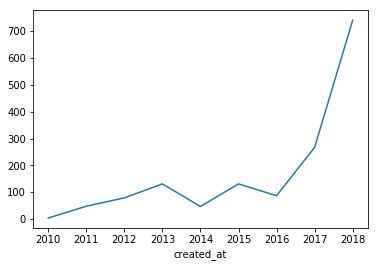

In [5]:
#df_train['id'].groupby([df_train['created_at'].dt.year, df_train['created_at'].dt.month])df_train['class'].agg({'count'})
#df_train.groupby([df_train["created_at"].dt.year,'class']).count().plot(kind="line")
df_labelled.groupby(df_labelled["created_at"].dt.year)['class'].count().plot(kind="line")
plt.show()

In [14]:
def vectorizer(df, tf_or_tfidf, nb_or_svm, random_state):
    
    #train test split
    X_train, X_test, y_train, y_test = train_test_split(df['tokenized_text'], df['class'], train_size =0.80, test_size = 0.2, random_state = random_state)
    
    if tf_or_tfidf == 'tf':
        # tokenize and build vocab by CountVectorizer
        vect = CountVectorizer().fit(X_train)
    elif tf_or_tfidf == 'tfidf':
        # tokenize and build vocab by TD-IDF
        #vect = TfidfVectorizer(min_df=0.05, max_df=0.95, ngram_range=(1,2)).fit(X_train)
        vect = TfidfVectorizer(min_df=5).fit(X_train)
        
    X_train_vectorized = vect.transform(X_train)
    
    if nb_or_svm == 'nb':
        model = MultinomialNB()
    elif nb_or_svm == 'svm':
        model = svm.SVC(kernel='linear')
        
    model.fit(X_train_vectorized , y_train)
    prediction = model.predict(vect.transform(X_test))
    
    #return prediction
    
    return print("F1 score(", tf_or_tfidf, nb_or_svm,"):" , f1_score(y_test, prediction, average='macro'))

In [15]:
vectorizer(df_labelled, 'tf', 'nb', 243)
vectorizer(df_labelled, 'tf', 'svm', 243)
vectorizer(df_labelled, 'tfidf', 'nb', 243)
vectorizer(df_labelled, 'tfidf', 'svm', 243)

C:\Users\Tse\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


F1 score( tf nb ): 0.7069842024691523
F1 score( tf svm ): 0.6956051283520182
F1 score( tfidf nb ): 0.2539706611853756
F1 score( tfidf svm ): 0.34450322928513166


In [8]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(df_labelled['tokenized_text'], df_labelled['class'], train_size =0.80, test_size = 0.2, random_state = 192)

In [9]:
# tokenize and build vocab
vect = TfidfVectorizer(min_df=10).fit(X_train)
# encode document
X_train_vectorized = vect.transform(X_train)
#print(X_train_vectorized.shape) much less features than CountVectorizer
print(vect.get_feature_names(),'\n')
print(len(vect.get_feature_names()))

['bmw', 'cn', 'cnbc', 'doge', 'good', 'gt', 'km', 'led', 'lpga', 'mask_num', 'shanshanfeng', 'suv', '一个', '一代', '一件', '一位', '一台', '一名', '一场', '一家', '一年', '一款', '一种', '一系列', '一览', '万元', '万港元', '万美元', '上市', '上市公司', '上海', '上涨', '下午', '下跌', '下降', '不再', '不到', '不少', '不语', '不错', '专场', '专家', '世界', '世界排名', '世纪', '业绩', '两个', '两位', '两种', '中国', '中国书画', '中心', '中控', '主席', '主管', '主题', '举办', '乔丹', '书画', '事件', '二十世纪', '亚洲', '交出', '交易', '产品', '亮点', '亮相', '人士', '人民币', '亿元', '亿美元', '今日', '代表', '令人', '价值', '价格', '企业', '伍兹', '优势', '优秀', '传奇', '传统', '伦敦', '估价', '位于', '低于', '体验', '作品', '作者', '佳士得', '依然', '信息', '俱乐部', '债务', '偷笑', '允悲', '充满', '充电', '克罗伊', '全国', '全新', '全日空', '全球', '公司', '公布', '公开', '公开赛', '公里', '关注', '内地', '内饰', '再度', '再次', '冠军', '冯珊珊', '决赛', '凤凰', '出行', '分享', '分析师', '刚刚', '创下', '创作', '利润', '利率', '到底', '制作', '刷新', '功率', '加上', '加油', '动力', '努力', '包括', '北京', '十年', '升至', '南非', '卫冕冠军', '印象', '印象派', '危机', '即将', '历史', '去年', '参加', '发动机', '发展', '发布', '发布会', '发现', '发生', '变化', '变速箱', '古代', '只能', '吃惊', '合作'

In [10]:
def perform_simple_count(df_post, max_df, min_df, n_top_words_count):
    df_train = df_post[~df_post['class'].isnull()]
    keywords = []
    for given_class in set(df_train['class']):
        df_class = df_train[df_train['class'] == given_class]

        # Convert documents into Term-Frequency matrix
        tf_vectorizer = CountVectorizer(max_df=max_df, min_df=min_df)
        tf = tf_vectorizer.fit_transform(df_class['tokenized_text'].tolist())
        
        # Add top words to keywords
        keywords.extend([keyword for keyword, count in sorted(list(zip(tf_vectorizer.get_feature_names(), np.asarray(tf.sum(axis=0)).ravel())), key=lambda x: x[1], reverse=True)[:n_top_words_count]])
        
    return list((set(keywords)))

In [11]:
perform_simple_count(df_labelled, 0.8, 0.1, 10)

['楼市',
 '教师',
 '债务',
 '公开赛',
 '企业',
 '中国',
 '孩子',
 '留学生',
 '全新',
 '瑰丽',
 '黄金',
 '呈献',
 '教育',
 '春拍',
 '车型',
 '拍品',
 '价格',
 '股市',
 '翡翠',
 '中国书画',
 '亿美元',
 '银价',
 '艺术家',
 '世界',
 '股票',
 '微博',
 'cn',
 '扯扯',
 '纽约',
 '比赛',
 '幼儿园',
 '美国',
 '富比',
 '经济',
 '老师',
 '首饰',
 '钻石',
 '金价',
 '黄金价格',
 '房地产',
 '写作',
 '家长',
 'cnbc',
 '政府',
 '银行',
 '香港',
 '大涨',
 '石油',
 '学生',
 '留学',
 '上海',
 '视频',
 '拍卖',
 '住房',
 '录制',
 '雅思',
 '公司',
 '并列',
 'mask_num',
 '能源',
 '瓷器',
 '新浪',
 '国际',
 '爱极客',
 '分析师',
 '原油',
 '资本',
 '市场',
 '作品',
 '高尔夫',
 '马力',
 '下跌',
 '艺术',
 '城市',
 '美元',
 '大师赛',
 '发动机',
 '房价',
 '小学',
 '股价',
 '佳士得',
 'doge']

In [12]:
def get_sample_weight(y, num_of_classes=3):
    dict_count = {}
    y_unique = set(y)
    for i in y_unique:
        dict_count[i] = sum([True for e in y if e == i])
    # get the sample weight
    max_count = max(dict_count.values())
    sample_weight = {k: v / max_count for k, v in dict_count.items()}
    sample_weight_result = [sample_weight[cl] for cl in y]
    return sample_weight_result

def get_identification_rate(model, test_X, test_y):
    preds = model.predict(test_X)
    num = 0
    for i, pred in enumerate(preds):
        if pred == test_y[i]:
            num += 1
    #print ('\r\nidentification rate:' + str(float(num) / len(preds)))
    return float(num) / len(preds)

In [13]:
y_train.shape

(1227,)